# NDVI_wetdry_stats_plot

This code plots up the statistics calculated using the NDVI_mask_rainfall_percentiles code. Site comparison of the difference between known palaeovalleys and their surrounds provides an indicator of the dataset's usefulness in determining the location of palaeovalleys. 

Written by Claire Krause, December 2016, Datacube v 1.13, Python v3.

### Code dependencies
- NDVI_wet.csv and NDVI_dry.csv, produced from NDVI_mask_rainfall_percentiles

In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
import statistics
import xarray

In [2]:
wet_stats = pandas.read_csv('/g/data/p25/cek156/NDVI/NDVI_wet.csv', delimiter = ',')
dry_stats = pandas.read_csv('/g/data/p25/cek156/NDVI/NDVI_dry.csv', delimiter = ',')
print(wet_stats)

            name  start_date        ttest   KS_test
0    Blackwood2A  1988-06-01  -559.893681  0.134386
1    Blackwood2A  1991-06-01  -450.398878  0.170897
2    Blackwood2A  1992-06-01  -501.285978  0.175443
3    Blackwood2A  1996-06-01  -667.626465  0.215480
4    Blackwood2A  1998-06-01  -806.703920  0.235543
5    Blackwood2A  2005-03-01  -700.493415  0.236278
6    Blackwood2B  1988-06-01  -854.332811  0.183167
7    Blackwood2B  1991-06-01  -457.657733  0.144034
8    Blackwood2B  1992-06-01  -583.927684  0.132481
9    Blackwood2B  1996-06-01  -542.853151  0.078995
10   Blackwood2B  1998-06-01  -693.892462  0.145862
11   Blackwood2B  2005-03-01  -528.746338  0.103998
12   Blackwood2C  1988-06-01  -372.570670  0.088399
13   Blackwood2C  1991-06-01  -141.857970  0.070329
14   Blackwood2C  1992-06-01  -510.623247  0.159687
15   Blackwood2C  1996-06-01  -564.240720  0.160768
16   Blackwood2C  1998-06-01  -613.689158  0.162869
17   Blackwood2C  2005-03-01  -671.392519  0.183822
18   Blackwo

In [3]:
study_sites = pandas.read_csv('/g/data/p25/cek156/case_study_sites.csv')
print(study_sites)

         Name  minlat  maxlat  minlon  maxlon
0  Blackwood2  -34.10  -32.70  116.40  118.40
1     Garford  -29.90  -29.23  133.15  134.70
2    Mandora1  -21.10  -18.87  120.90  127.00
3    Mandora2  -20.03  -18.88  120.90  123.30
4   Murchison  -27.95  -25.49  114.75  119.30
5         Ord  -15.93  -15.05  128.30  129.29
6      TiTree  -23.04  -21.67  133.18  134.24
7    Daintree  -16.39  -16.09  145.21  145.42
8       Laura  -15.85  -14.43  143.42  144.89
9  Blackwood1  -34.40  -33.58  115.00  116.40


## Make a grouped bar chart showing the t test statistic for the mean values for each site

In [4]:
mean_values = pandas.DataFrame(columns = ['Site', 'wet_mean', 'dry_mean'])

exclude_last_three = study_sites[:-3]
for idx, site in enumerate(exclude_last_three.Name):
    wet_mean = wet_stats[wet_stats.name.str.contains(site)].ttest.mean()
    dry_mean = dry_stats[dry_stats.name.str.contains(site)].ttest.mean()
    mean_values.loc[idx] = [site, wet_mean, dry_mean]

print(mean_values)

         Site    wet_mean    dry_mean
0  Blackwood2 -605.200952 -488.701943
1     Garford -234.578226 -137.470436
2    Mandora1 -138.562743  -38.029561
3    Mandora2    7.960955   65.610779
4   Murchison  377.943988  384.179109
5         Ord  555.116836  155.306494
6      TiTree  -51.196851  230.262440


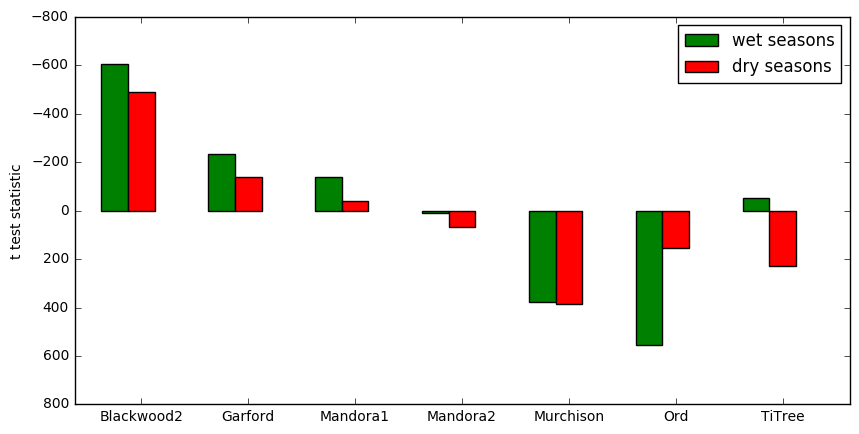

In [5]:
# Setting the positions and width for the bars
pos = list(range(len(mean_values.wet_mean)))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos, mean_values['wet_mean'], width, color = 'g')
plt.bar([p + width for p in pos], mean_values['dry_mean'], width, color = 'r')

# Set the y axis label
ax.set_ylabel('t test statistic')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(mean_values['Site'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([800, -800])

# Adding the legend and showing the plot
plt.legend(['wet seasons', 'dry seasons'], loc='upper right')

#Let's save the plot
plt.savefig('NDVI_wet_dry_ttest.jpg', bbox_inches='tight')

## Now do the same for the KS statistic

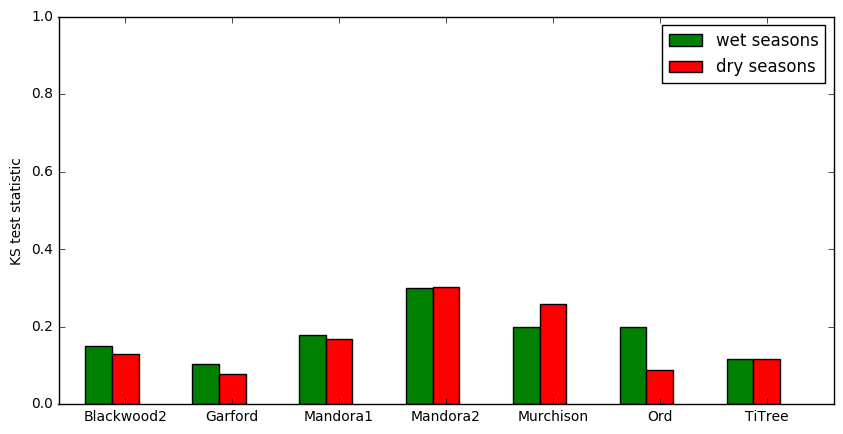

In [6]:
mean_values = pandas.DataFrame(columns = ['Site', 'wet_mean', 'dry_mean'])

exclude_last_three = study_sites[:-3]
for idx, site in enumerate(exclude_last_three.Name):
    wet_mean = wet_stats[wet_stats.name.str.contains(site)].KS_test.mean()
    dry_mean = dry_stats[dry_stats.name.str.contains(site)].KS_test.mean()
    mean_values.loc[idx] = [site, wet_mean, dry_mean]

# Setting the positions and width for the bars
pos = list(range(len(mean_values.wet_mean)))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos, mean_values['wet_mean'], width, color = 'g')
plt.bar([p + width for p in pos], mean_values['dry_mean'], width, color = 'r')

# Set the y axis label
ax.set_ylabel('KS test statistic')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(mean_values['Site'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 1])

# Adding the legend and showing the plot
plt.legend(['wet seasons', 'dry seasons'], loc='upper right')

#Let's save the plot
plt.savefig('NDVI_wet_dry_KS.jpg', bbox_inches='tight')